## Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

from matplotlib import colormaps

%matplotlib inline

## Dataset creation (df-circuler and df2-non-circuler)

### Dataset 1 (df)

In [47]:
# Func to create random D.Points
np.random.seed(42)

def PointsCircle(r, n=100):
  return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30, 30), math.sin(2*math.pi/n*x)*r+np.random.normal(-30, 30)) for x in range(1, n+1)]


In [48]:
# Creating D.points - Circles
df = pd.DataFrame(PointsCircle(500, 1000))
df = pd.concat([df, pd.DataFrame(PointsCircle(300, 700))], ignore_index=True)
df = pd.concat([df, pd.DataFrame(PointsCircle(100, 300))], ignore_index=True)
# Add noises
# Generate 300 random (x, y) pairs
rand_points = pd.DataFrame(
    [(np.random.randint(-600, 600), np.random.randint(-600, 600)) for _ in range(300)]#, columns=["x", "y"]
  )

# Concatenate with the existing DataFrame
df = pd.concat([df, rand_points], ignore_index=True)

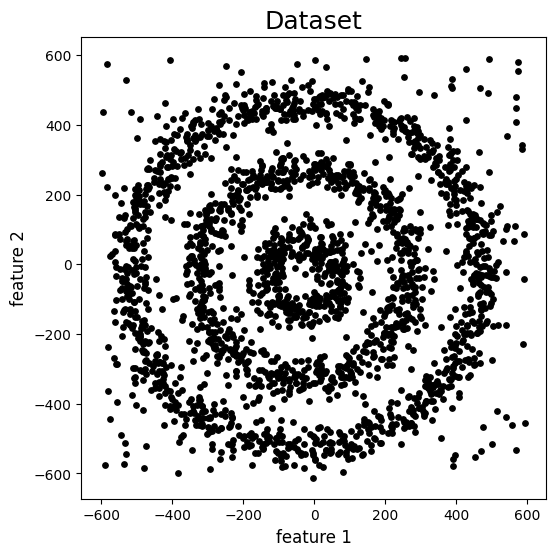

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1], s=15, color='black')
plt.title('Dataset', fontsize=18)
plt.xlabel('feature 1', fontsize=12)
plt.ylabel('feature 2', fontsize=12)
plt.show()

### Dataset 2 (df2)

In [50]:
# Create 300 random 2D points in range
centers = [[1, 1], [-1, -1], [1, -1]]
df2, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

# Convert array to DataFrame with column names 0 and 1
df2 = pd.DataFrame(df2, columns=[0, 1])

# Add true labels to df (optional)
df2['label_true'] = labels_true

# Preview
print(df2.head())

          0         1  label_true
0  1.475044  0.924321           0
1 -0.022044 -0.804953           1
2 -1.176716 -1.808237           1
3  0.772234  1.008740           0
4  1.232831  0.231878           0


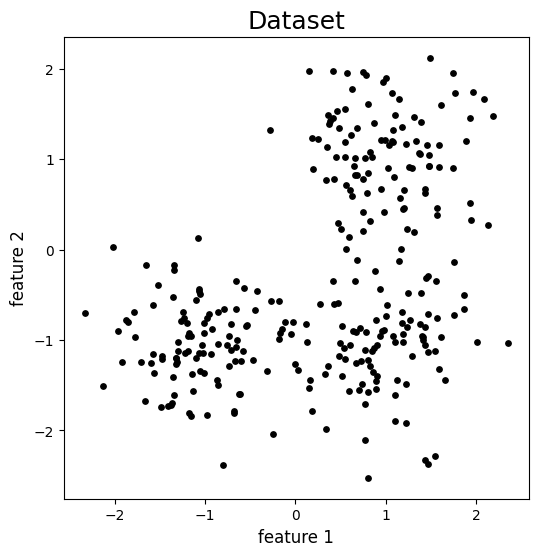

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(df2[0],df2[1], s=15, color='black')
plt.title('Dataset', fontsize=18)
plt.xlabel('feature 1', fontsize=12)
plt.ylabel('feature 2', fontsize=12)
plt.show()

## Comparison of Clusters with random number of clusters

### K-mans Clustering for the df1

In [52]:

kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [53]:
df['KMeans_lables'] = kmeans.labels_

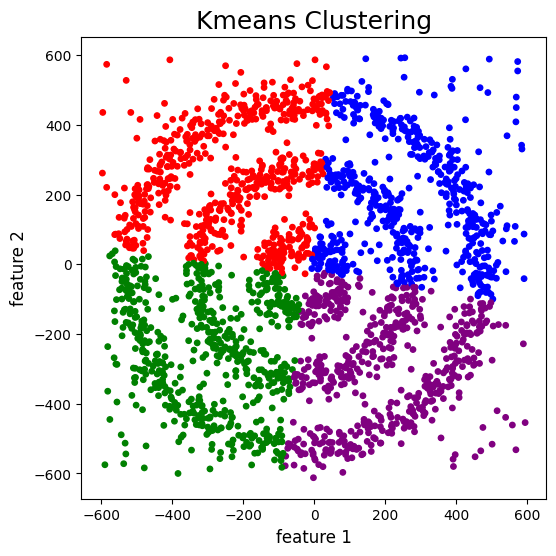

In [54]:
colors = ['purple', 'red', 'blue', 'green']
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1], c=df['KMeans_lables'], cmap= matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Kmeans Clustering', fontsize=18)
plt.xlabel('feature 1', fontsize=12)
plt.ylabel('feature 2', fontsize=12)
plt.show()

### K-means Clustering for the df2

In [55]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(df2[[0,1]])

KMeans(n_clusters=5, random_state=42)

In [56]:
df2['KMeans_lables'] = kmeans.labels_

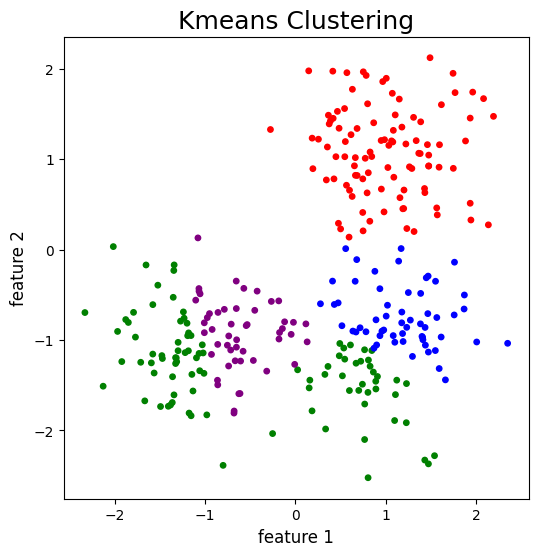

In [57]:
colors = ['purple', 'red', 'blue', 'green']
plt.figure(figsize=(6,6))
plt.scatter(df2[0],df2[1], c=df2['KMeans_lables'], cmap= matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Kmeans Clustering', fontsize=18)
plt.xlabel('feature 1', fontsize=12)
plt.ylabel('feature 2', fontsize=12)
plt.show()

### Hierarchical Clustering for the df1

In [58]:
model = AgglomerativeClustering(n_clusters= 5, metric = 'euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=5)

In [59]:
df['HR_lables'] = model.labels_

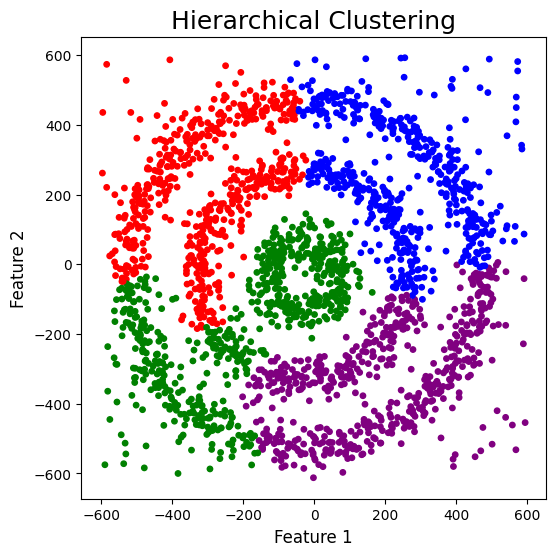

In [60]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], c= df['HR_lables'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Hierarchical Clustering', fontsize=18)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()


### Hierarchical Clustering for the df2

In [61]:
model = AgglomerativeClustering(n_clusters= 5, metric = 'euclidean')
model.fit(df2[[0,1]])

df2['HR_lables'] = model.labels_

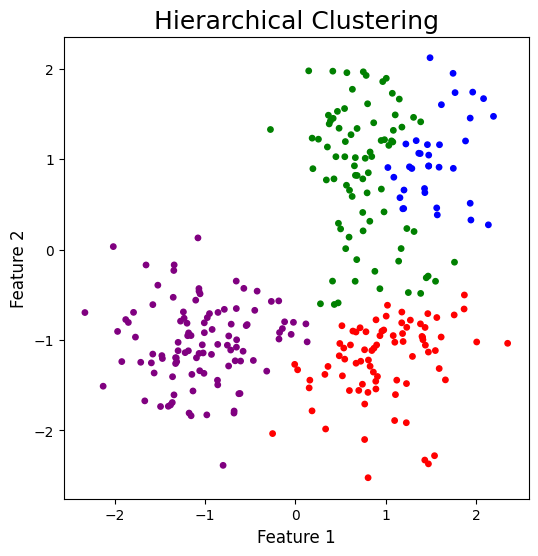

In [62]:
plt.figure(figsize=(6,6))
plt.scatter(df2[0], df2[1], c= df2['HR_lables'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Hierarchical Clustering', fontsize=18)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()


### DBSCAN for the df1

In [63]:
#DBSCAN
dbscan = DBSCAN(eps=30, min_samples=6)
dbscan.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [64]:
df['DBSCAN_opt_lables'] = dbscan.labels_
df['DBSCAN_opt_lables'].value_counts()

,count
DBSCAN_opt_lables,
0,1030
1,730
2,318
-1,222


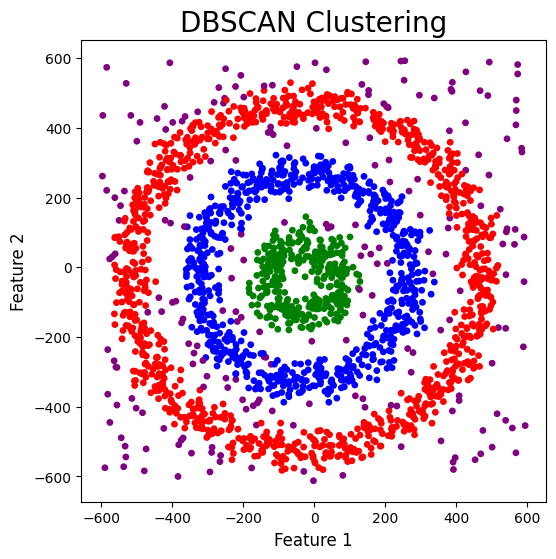

In [65]:
plt.figure(figsize=(6,6))
plt.scatter(df[0], df[1], c=df['DBSCAN_opt_lables'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

### DBSCAN for the df2

In [66]:
#DBSCAN is auckward here!
dbscan = DBSCAN(eps=30, min_samples=6)
dbscan.fit(df2[[0,1]])
df2['DBSCAN_opt_lables'] = dbscan.labels_
df2['DBSCAN_opt_lables'].value_counts()

,count
DBSCAN_opt_lables,
0,300


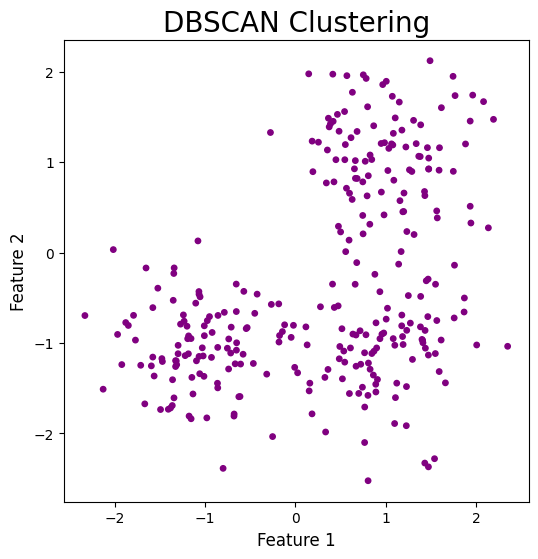

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(df2[0], df2[1], c=df2['DBSCAN_opt_lables'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

### Affinity Propagation For the df1



In [79]:
# Affinity Propagation
# Compute Affinity Propagation
af_model = AffinityPropagation(preference=None).fit(df[[0,1]])
cluster_centers_indices = af_model.cluster_centers_indices_
labels = af_model.labels_
n_clusters_ = len(cluster_centers_indices)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [80]:
print("Number of clusters detected by the algorithm:", n_clusters_)

Number of clusters detected by the algorithm: 396


In [81]:
print("Cluster centers detected at:\n\n", df.iloc[cluster_centers_indices])

Cluster centers detected at:

                0           1  KMeans_lables  HR_lables  DBSCAN_opt_lables  \
26    442.514638   72.767011              2          2                  0   
33    456.473758  106.109542              2          2                  0   
35    468.105305  128.276477              2          2                  0   
37    377.223513  112.906574              2          2                 -1   
44    434.254037  124.893576              2          2                  0   
...          ...         ...            ...        ...                ...   
2249 -517.000000  436.000000              1          1                 -1   
2250   92.000000 -108.000000              0          4                  2   
2260  489.000000  493.000000              2          2                 -1   
2261 -154.000000 -185.000000              3          4                 -1   
2271  398.000000  185.000000              2          2                  0   

      kmeans_label  
26               2  
33

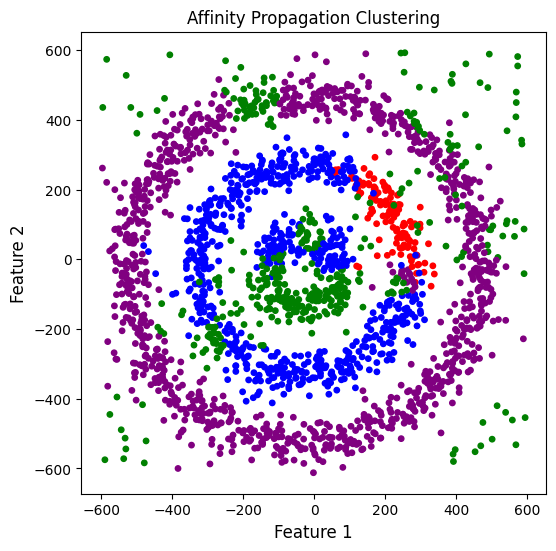

In [82]:
# Plot clustered points
plt.figure(figsize=(6, 6))
plt.scatter(df[0], df[1], c=af_model.labels_, cmap = matplotlib.colors.ListedColormap(colors), s=15)
plt.title("Affinity Propagation Clustering", fontsize=12)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

### Affinity Propagation For the df2

In [87]:
# For the df2
# Compute Affinity Propagation
af_model = AffinityPropagation(preference=-50).fit(df2[[0,1]])
cluster_centers_indices = af_model.cluster_centers_indices_
labels = af_model.labels_
n_clusters_ = len(cluster_centers_indices)

In [88]:
print("Number of clusters detected by the algorithm:", n_clusters_)

Number of clusters detected by the algorithm: 3


In [89]:
print("Cluster centers detected at:\n\n", df2.iloc[cluster_centers_indices])

Cluster centers detected at:

             0         1  label_true  KMeans_lables  HR_lables  \
160  1.033259  1.151236           0              1          4   
250  0.934947 -0.953023           2              2          1   
272 -1.184591 -1.119690           1              3          0   

     DBSCAN_opt_lables  kmeans_label  
160                  0             1  
250                  0             2  
272                  0             0  


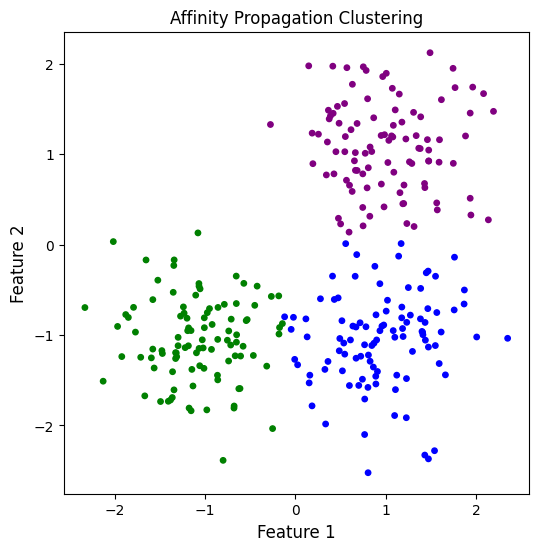

In [90]:
# Plot clustered points
plt.figure(figsize=(6, 6))
plt.scatter(df2[0], df2[1], c=af_model.labels_, cmap = matplotlib.colors.ListedColormap(colors), s=15)
plt.title("Affinity Propagation Clustering", fontsize=12)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

## Silhouette and Elbow methods to find the best number of clusters

In [76]:
# Function to find k best Clusters
def find_best_k_and_plot(df, color_list=None):
    """
    Perform KMeans clustering on first 2 columns of df, determine best k via silhouette score,
    and visualize results with default settings.
    """
    # Auto-detect first 2 numeric columns (robust for both named and numeric-indexed)
    cols = df.select_dtypes(include=[np.number]).columns[:2]
    X = df[cols]

    k_range = range(2, 10)
    wcss, sil_scores = [], []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(X, kmeans.labels_))

    # Plot elbow and silhouette
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(k_range, wcss, marker='o')
    axs[0].set_title('Elbow Method')
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('WCSS')
    axs[1].plot(k_range, sil_scores, marker='o', color='orange')
    axs[1].set_title('Silhouette Score')
    axs[1].set_xlabel('k')
    axs[1].set_ylabel('Score')
    plt.tight_layout()
    plt.show()

    # Best k
    best_k = k_range[sil_scores.index(max(sil_scores))]
    print(f"Best k based on silhouette: {best_k}")

    # Final clustering
    kmeans_final = KMeans(n_clusters=best_k, random_state=42)
    df['kmeans_label'] = kmeans_final.fit_predict(X)

    # Visualization
    # Use default or custom color list
    if color_list is None:
        cmap = colormaps.get_cmap('Set1', best_k)
    else:
        cmap = matplotlib.colors.ListedColormap(color_list[:best_k])
    plt.figure(figsize=(6, 5))
    plt.scatter(df[cols[0]], df[cols[1]], c=df['kmeans_label'], cmap=cmap, s=15)
    plt.title(f'K-Means Clustering (k={best_k})')
    plt.grid(True)
    plt.show()

    return best_k, df

### Find k clusters for df (Circular)

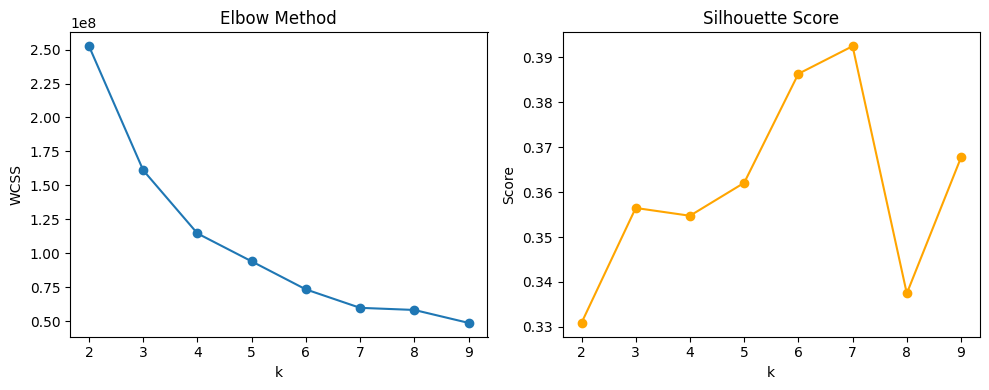

Best k based on silhouette: 7


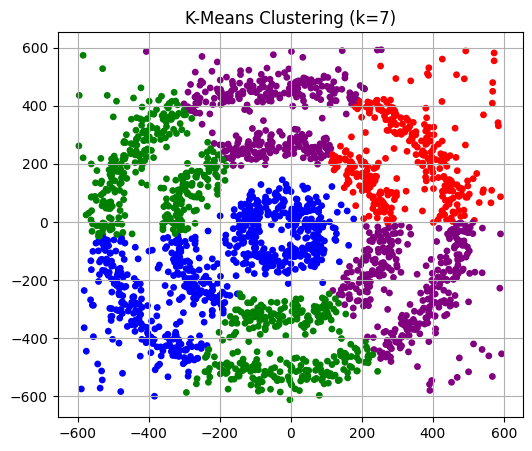

In [77]:
# Apply on df with default settings
best_k, clustered_df = find_best_k_and_plot(df, color_list=colors)

### Find k clusters for df1 (Non-circular)

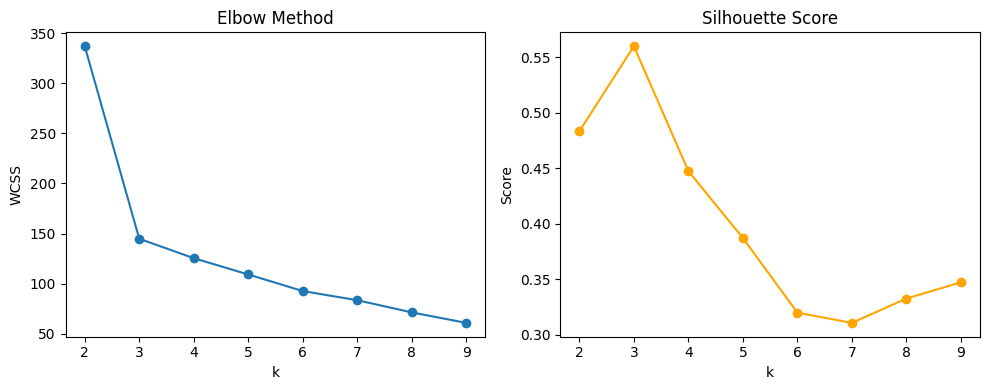

Best k based on silhouette: 3


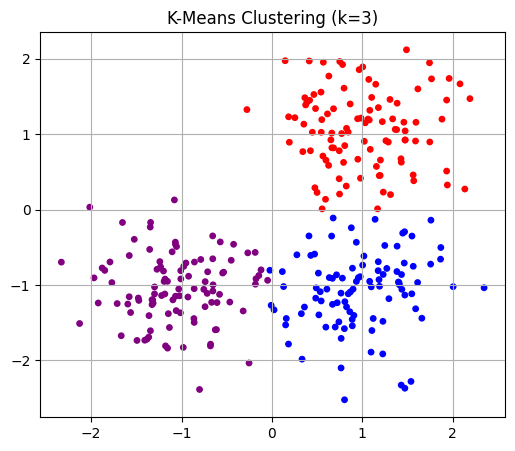

In [78]:
# Apply on df2 with default settings
best_k, clustered_df = find_best_k_and_plot(df2, color_list=colors)
